In [1]:
import numpy
import os
import shutil
import os
from keras.preprocessing.image import ImageDataGenerator
import random
from keras.applications import mobilenet_v2
from keras.layers import Dense
from keras.models import Model
import tensorflow as tf


In [ ]:
# tf.config.list_physical_devices('GPU')

In [ ]:
import splitfolders

In [ ]:
# tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [ ]:
os.getcwd()

'd:\\Trical 4th sem\\Project\\Mask Detector'

In [ ]:
os.chdir('NewDataCheck')

In [ ]:
# print(len(os.listdir('../Mask Dataset/with_mask')),len(os.listdir('../Mask Dataset/without_mask')))

In [ ]:
categories = ['with_mask','without_mask']

In [ ]:
if os.path.isdir('train/with_mask') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    shutil.move('with_mask','train')
    shutil.move('without_mask','train')
    print(len(os.listdir('train/with_mask')),len(os.listdir('train/without_mask')))
    input()
    for category in categories:
        os.mkdir(f'valid/{category}')
        valid_samples = random.sample(os.listdir(f'train/{category}'),300)
        for valid_items in valid_samples:
            shutil.move(f'train/{category}/{valid_items}',f'valid/{category}')
        
        os.mkdir(f'test/{category}')
        test_samples = random.sample(os.listdir(f'train/{category}'),5)
        for test_items in test_samples:
            shutil.move(f'train/{category}/{test_items}',f'test/{category}')
            

In [ ]:
if os.path.isdir('train/with_mask') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    shutil.move('with_mask','train')
    shutil.move('without_mask','train')
    print(len(os.listdir('train/with_mask')),len(os.listdir('train/without_mask')))
    input()
    for category in categories:
        os.mkdir(f'valid/{category}')
        valid_samples = random.sample(os.listdir(f'train/{category}'),300)
        for valid_items in valid_samples:
            shutil.move(f'train/{category}/{valid_items}',f'valid/{category}')
        
        os.mkdir(f'test/{category}')
        test_samples = random.sample(os.listdir(f'train/{category}'),5)
        for test_items in test_samples:
            shutil.move(f'train/{category}/{test_items}',f'test/{category}')
            

In [ ]:
os.chdir('../')

In [ ]:
from tensorflow.keras.layers import Input

In [ ]:
mobile = mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [ ]:
from keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
train_batch = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,zoom_range=0.15,width_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
valid_batch = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,zoom_range=0.15,width_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
test_batch = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=20,zoom_range=0.15,width_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [ ]:
train_path = 'NewDataCheck/train'
valid_path = 'NewDataCheck/valid'
test_path = 'NewDataCheck/test'

In [ ]:
train_batch_preprocessed = train_batch.flow_from_directory(directory=train_path,target_size=(224,224),batch_size=12)
valid_batch_preprocessed = valid_batch.flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=12)
test_batch_preprocessed = test_batch .flow_from_directory(directory=test_path,target_size=(224,224),batch_size=12,shuffle=False)

Found 4484 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
# for x,y in train_batch_preprocessed:
#     print(x,y)

In [ ]:
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout

In [ ]:
custom_cnn=mobile.output
custom_cnn=AveragePooling2D(pool_size=(7,7))(custom_cnn)
custom_cnn=Flatten(name='Flatten')(custom_cnn)
custom_cnn=Dense(128,activation='relu')(custom_cnn)
custom_cnn=Dropout(0.5)(custom_cnn)
custom_cnn=Dense(2,activation='sigmoid')(custom_cnn)

In [ ]:
cnn_custom_model = Model(inputs=mobile.input,outputs=custom_cnn)

In [ ]:
cnn_custom_model.summary()

In [ ]:
for layer in mobile.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
cnn_custom_model.compile(loss="binary_crossentropy", optimizer=Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS),
	metrics=["accuracy"])

C:\Users\User.LAPTOP-3EBUUP6S\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
trainedModel=cnn_custom_model.fit(x=test_batch_preprocessed,validation_data=valid_batch_preprocessed,epochs=40)

Epoch 1/40
1/1 [==============================] - 32s 32s/step - loss: 0.9304 - accuracy: 0.6000 - val_loss: 0.7648 - val_accuracy: 0.4400
Epoch 2/40
1/1 [==============================] - 21s 21s/step - loss: 0.9628 - accuracy: 0.3000 - val_loss: 0.7534 - val_accuracy: 0.4650
Epoch 3/40
1/1 [==============================] - 21s 21s/step - loss: 0.8471 - accuracy: 0.6000 - val_loss: 0.7376 - val_accuracy: 0.5150
Epoch 4/40
1/1 [==============================] - 23s 23s/step - loss: 0.9870 - accuracy: 0.4000 - val_loss: 0.7358 - val_accuracy: 0.5067
Epoch 5/40
1/1 [==============================] - 22s 22s/step - loss: 0.6838 - accuracy: 0.7000 - val_loss: 0.7390 - val_accuracy: 0.4800
Epoch 6/40
1/1 [==============================] - 20s 20s/step - loss: 0.7878 - accuracy: 0.6000 - val_loss: 0.7208 - val_accuracy: 0.5200
Epoch 7/40
1/1 [==============================] - 20s 20s/step - loss: 0.5606 - accuracy: 0.9000 - val_loss: 0.7178 - val_accuracy: 0.5050
Epoch 8/40
1/1 [===========

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from numpy import  expand_dims

In [ ]:
os.getcwd()

'd:\\Trical 4th sem\\Project\\Mask Detector'

In [ ]:
real_testImg = load_img(path='Dataset/test_img3.jpg',target_size=(224,224))
real_testImg_Array = img_to_array(real_testImg)
real_testImg_Expanded = expand_dims(real_testImg_Array,axis=0)

In [ ]:
prediction=cnn_custom_model.predict(x=real_testImg_Expanded)
print(prediction)

[[0.22795978 0.6762416 ]]


In [ ]:
sum([0.22795978,0.6762416 ])

0.9042013799999999

In [ ]:
# test_batch_preprocessed.class_indices

In [ ]:
max(prediction[0])

0.6762416

In [ ]:
cnn_custom_model.save(r'D:\Trical 4th sem\Project\newBuiltModel\customModel.model',save_format='h5')

In [ ]:
from matplotlib import pyplot as plt

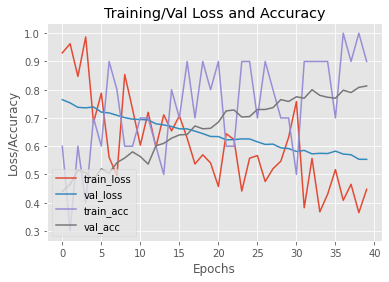

In [ ]:
N = 40
plt.style.use('ggplot')
plt.figure()
plt.plot(numpy.arange(0,N),trainedModel.history['loss'],label="train_loss")
plt.plot(numpy.arange(0,N),trainedModel.history['val_loss'],label="val_loss")
plt.plot(numpy.arange(0,N),trainedModel.history['accuracy'],label="train_acc")
plt.plot(numpy.arange(0,N),trainedModel.history['val_accuracy'],label="val_acc")
plt.title("Training/Val Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")


In [ ]:
from sklearn.metrics import classification_report 

In [ ]:
# test_X = []
# test_Y = []

In [ ]:
# for X,Y in test_batch_preprocessed:
#     test_X.append(X)
#     test_Y.append(Y)
    
# test_X = numpy.array(test_X)
# test_Y = numpy.array(test_Y)



In [ ]:
print(numpy.array(['with_mask','without_mask']))

['with_mask' 'without_mask']


In [ ]:
predict_many = cnn_custom_model.predict(x=test_batch_preprocessed,batch_size=12)
predict_many = numpy.argmax(predict_many,axis=1)
print(test_batch_preprocessed.classes)
print(classification_report(test_batch_preprocessed.classes,y_pred=predict_many,labels=test_batch_preprocessed.classes))

[0 0 0 0 0 1 1 1 1 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           0       1.00      1.00      1.00         5
           0       1.00      1.00      1.00         5
           0       1.00      1.00      1.00         5
           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

